<a href="https://colab.research.google.com/github/neto-riga/Metodos_Numericos/blob/main/Ejercicio_15_Potencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 15. Método de potencias.
----
Martínez Venegas Raúl \\
Rivera Gálvez Ernesto

## [Regresar al ínidce](https://github.com/neto-riga/Metodos_Numericos/blob/main/Portafolio.md#índice)

Se deben mostrar las iteraciones para obtener los valores propios, máximo y mínimo, de la siguiente matriz. 

$$ A = \begin{bmatrix}
4& 2& -1&  1\\  
2& 8&  4& -3\\  
3& 6&  2&  2\\
1& 2&  1& -1  
\end{bmatrix}
$$


* Elegir el vector a partir de los círculos de Gershorin.
* Obtener los valores propios con una tolerancia de 0.0005.

#Importamos las librerias.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from google.colab import output
sns.set_theme()

Obtenemos los círculos de Gershgorin, por lo que tenemos:      

$$\begin{eqnarray}
R_{1}&=& \left\{z\in \mathbb C: |z - 4| \leq  4\right\}\\  
R_{2}&=& \left\{z\in \mathbb C: |z - 8| \leq  9\right\}\\  
R_{3}&=& \left\{z\in \mathbb C: |z - 2| \leq  11\right\}\\  
R_{4}&=& \left\{z\in \mathbb C: |z - (-1)| \leq  4\right\}
\end{eqnarray}
$$

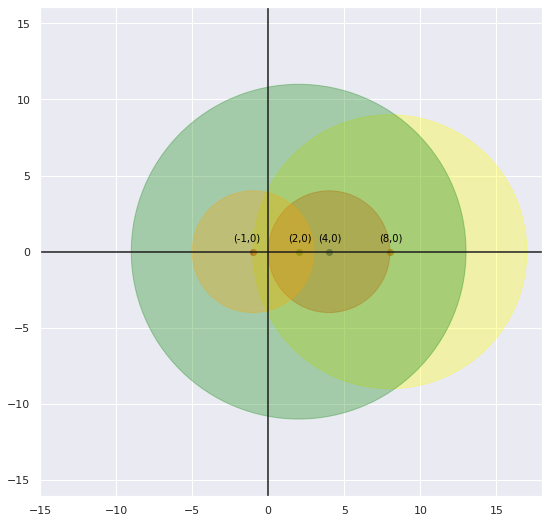

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(9,9))
ax.add_patch(plt.Circle((4, 0), 4, color='RED', alpha=0.3))
plt.scatter(4,0, marker = "o")
plt.text(3.3,0.7, '(4,0)', fontsize=10, color='black')
ax.add_patch(plt.Circle((8, 0), 9, color='YELLOW', alpha=0.3))
plt.scatter(8,0, marker = "o")
plt.text(7.3,0.7, '(8,0)', fontsize=10, color='black')
ax.add_patch(plt.Circle((2, 0), 11, color='GREEN', alpha=0.3))
plt.scatter(2,0, marker = "o")
plt.text(1.3,0.7, '(2,0)', fontsize=10, color='black')
ax.add_artist(plt.Circle((-1, 0), 4, color='ORANGE', alpha=0.3))
plt.scatter(-1,0, marker = "o")
plt.text(-2.3,0.7, '(-1,0)', fontsize=10, color='black')
plt.hlines(y=0, xmin=-20, xmax=25)
plt.vlines(x=0, ymin=-20, ymax=20)
plt.xlim(-15,18)
plt.ylim(-15,15)
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   
plt.show()

## Para el valor propio máximo

Como puede observarse $R_{2}$ tiene ventaja sobre los demás renglones, por lo que elegimos como vector incial el vector 

$$x^{0} = \begin{bmatrix}
0\\  
1\\  
0\\ 
0
\end{bmatrix}$$

#Implementación del método

In [ ]:
def potencia(mat, y):
  sol = mat @ y
  espectral = np.abs(sol).max()
  temp = np.where(np.abs(sol) == espectral)[0][0]
  λ = sol[temp]
  sol /= λ
  return espectral, sol

### Inicializando la matriz y vector inicial

In [ ]:
n = 4
mat = np.array([[4, 2, -1, 1],
                [2, 8, 4, -3],
                [3, 6, 2, 2],
                [1, 2, 1, -1]])

res = np.where(np.abs(mat) == np.abs(mat).diagonal().max())[0]
y_0 = np.zeros(n)
y_0[res[0]] = 1

#Resultados

In [ ]:
df = pd.DataFrame([(8,np.nan)], columns = ['λ(k+1)' , 'Error'])
Error=1
espec = []
tab=[]
i=0
while Error>0.0005:
  espectral, y_1 = potencia(mat, y_0)
  espec.append(espectral)
  if i>=1: 
    Error = abs(espec[i] - espec[i-1])
    tab=[espec[i],Error]
    df.loc[i+1]=tab
  y_0 = y_1
  i+=1

df

,λ(k+1),Error
0,8.000000,NaN
2,10.750000,2.750000
3,10.953488,0.203488
4,10.895966,0.057522
5,10.883087,0.012880
6,10.878715,0.004371
7,10.877633,0.001082
8,10.877332,0.000301


## Para el valor propio mínimo

Como puede observarse $R_{3}$ puede contener el valor mínimo, por lo que elegimos como vector incial el vector 

$$x^{0} = \begin{bmatrix}
0\\  
0\\  
1\\ 
0
\end{bmatrix}$$

### Inizializando lso valores

In [ ]:
mat = np.linalg.inv(mat)

y_0 = np.zeros(n)
y_0[2] = 1

## Resultados

In [ ]:
df = pd.DataFrame([(1 / 4, np.nan)], columns = ['λ(k+1)' , 'Error'])
Error=1
tab=[]
i=0
while Error>0.0005:
  espectral, y_1 = potencia(mat, y_0)
  if i>=1: 
    Error = abs(espec[i] - espec[i-1])
    tab=[1 / espectral, Error]
    df.loc[i+1]=tab
  y_0 = y_1
  i+=1

df

,λ(k+1),Error
0,0.250000,NaN
2,0.346667,1.142857
3,0.725215,2.804511
4,0.545040,0.052632
5,0.620535,0.105769
6,0.587449,0.010655
7,0.601730,0.004895
8,0.595529,0.001039
9,0.598216,0.000311


## [Regresar al ínidce](https://github.com/neto-riga/Metodos_Numericos/blob/main/Portafolio.md#índice)